# Desafio Cientista de Dados - Séries temporais

## Modelagem e predição

Instalação das bibliotecas e pacotes necessários, e inclusão dos dados

In [ ]:
!pip install statsforecast

In [ ]:
import pandas as pd

from statsforecast import StatsForecast
from statsforecast.models import AutoARIMA
from google.colab import drive

drive.mount ('/content/drive')

/usr/local/lib/python3.10/dist-packages/statsforecast/core.py:25: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_excel('/content/drive/MyDrive/Lighthouse/Desafio DS/EDA_desafioDS.xlsx')
df.head()

,Unnamed: 0,unique_id,ds,y
0,0,Afghanistan,1980,3.3
1,1,Albania,1980,2.7
2,2,Algeria,1980,-5.4
3,3,Andorra,1980,3.3
4,4,Angola,1980,2.4


In [ ]:
df = df.drop(columns=['Unnamed: 0'])

In [ ]:
df.head()

,unique_id,ds,y
0,Afghanistan,1980,3.3
1,Albania,1980,2.7
2,Algeria,1980,-5.4
3,Andorra,1980,3.3
4,Angola,1980,2.4


## Exemplo de predição utilizando o modelo ARIMA

In [ ]:
sf = StatsForecast(
    models = [AutoARIMA(season_length = 12)],
    freq = 'M'
)

sf.fit(df)

StatsForecast(models=[AutoARIMA])

In [ ]:
forecast_df = sf.predict(h=12, level=[90])

forecast_df.tail()

,ds,AutoARIMA,AutoARIMA-lo-90,AutoARIMA-hi-90
unique_id,,,,
Zimbabwe,2031,-1.711605,-15.346340,11.923129
Zimbabwe,2032,-5.303201,-18.937937,8.331533
Zimbabwe,2033,6.399039,-7.235696,20.033773
Zimbabwe,2034,7.562335,-6.072400,21.197069
Zimbabwe,2035,4.993281,-8.641453,18.628016


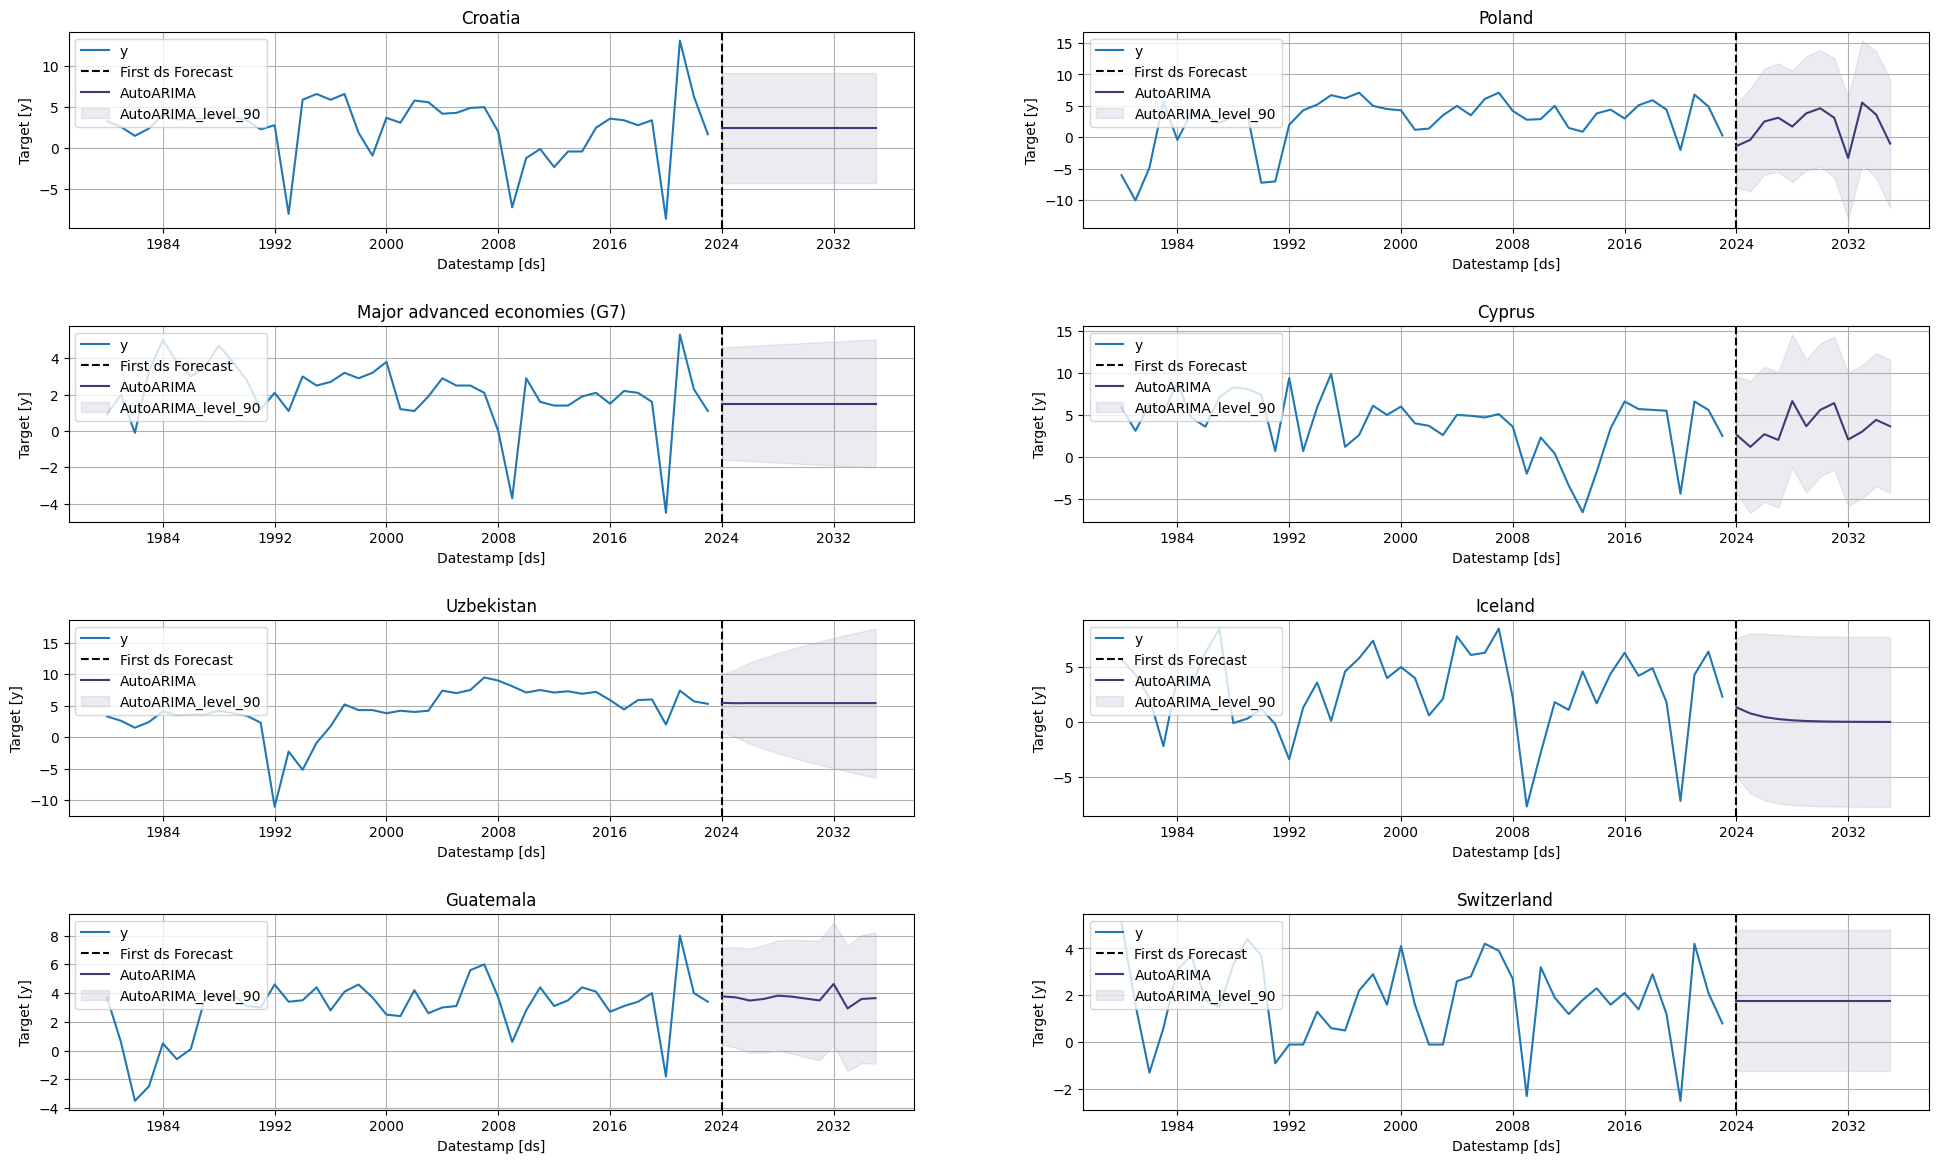

In [ ]:
sf.plot(df, forecast_df, level=[90])

## Comparando o modelo ARIMA com outros modelos possíveis

In [ ]:
from statsforecast.models import (
    AutoARIMA,
    HoltWinters,
    CrostonClassic as Croston,
    HistoricAverage,
    DynamicOptimizedTheta as DOT,
    SeasonalNaive
)


models = [
    AutoARIMA(season_length=12),
    HoltWinters(),
    Croston(),
    SeasonalNaive(season_length=12),
    HistoricAverage(),
    DOT(season_length=12)
]

In [ ]:
sf = StatsForecast(
    df=df,
    models=models,
    freq='M',
    n_jobs=-1,
    fallback_model = SeasonalNaive(season_length=12)
)

In [ ]:
forecasts_df = sf.forecast(h=5, level=[90])

forecasts_df.head()

,ds,AutoARIMA,AutoARIMA-lo-90,AutoARIMA-hi-90,HoltWinters,HoltWinters-lo-90,HoltWinters-hi-90,CrostonClassic,CrostonClassic-lo-90,CrostonClassic-hi-90,SeasonalNaive,SeasonalNaive-lo-90,SeasonalNaive-hi-90,HistoricAverage,HistoricAverage-lo-90,HistoricAverage-hi-90,DynamicOptimizedTheta,DynamicOptimizedTheta-lo-90,DynamicOptimizedTheta-hi-90
unique_id,,,,,,,,,,,,,,,,,,,
ASEAN-5,2024,4.032940,-1.441611,9.507491,6.2,-0.172017,12.572017,6.2,-0.172017,12.572017,6.2,-0.172017,12.572017,5.027273,-0.223971,10.278517,4.168433,-0.781250,10.411557
ASEAN-5,2025,4.022300,-1.485466,9.530066,5.0,-1.372017,11.372017,5.0,-1.372017,11.372017,5.0,-1.372017,11.372017,5.027273,-0.223971,10.278517,4.166541,-1.536248,8.853305
ASEAN-5,2026,4.011687,-1.528920,9.552295,4.5,-1.872017,10.872017,4.5,-1.872017,10.872017,4.5,-1.872017,10.872017,5.027273,-0.223971,10.278517,4.164701,-2.659704,9.395596
ASEAN-5,2027,4.001103,-1.571981,9.574187,4.6,-1.772017,10.972016,4.6,-1.772017,10.972016,4.6,-1.772017,10.972016,5.027273,-0.223971,10.278517,4.162909,-1.501479,8.841671
ASEAN-5,2028,3.990547,-1.614656,9.595750,4.8,-1.572017,11.172017,4.8,-1.572017,11.172017,4.8,-1.572017,11.172017,5.027273,-0.223971,10.278517,4.161162,-0.598724,9.991510


Acima vemos a previsão dos dados para cada modelo e abaixo o comportamento dos dados em relação aos outros

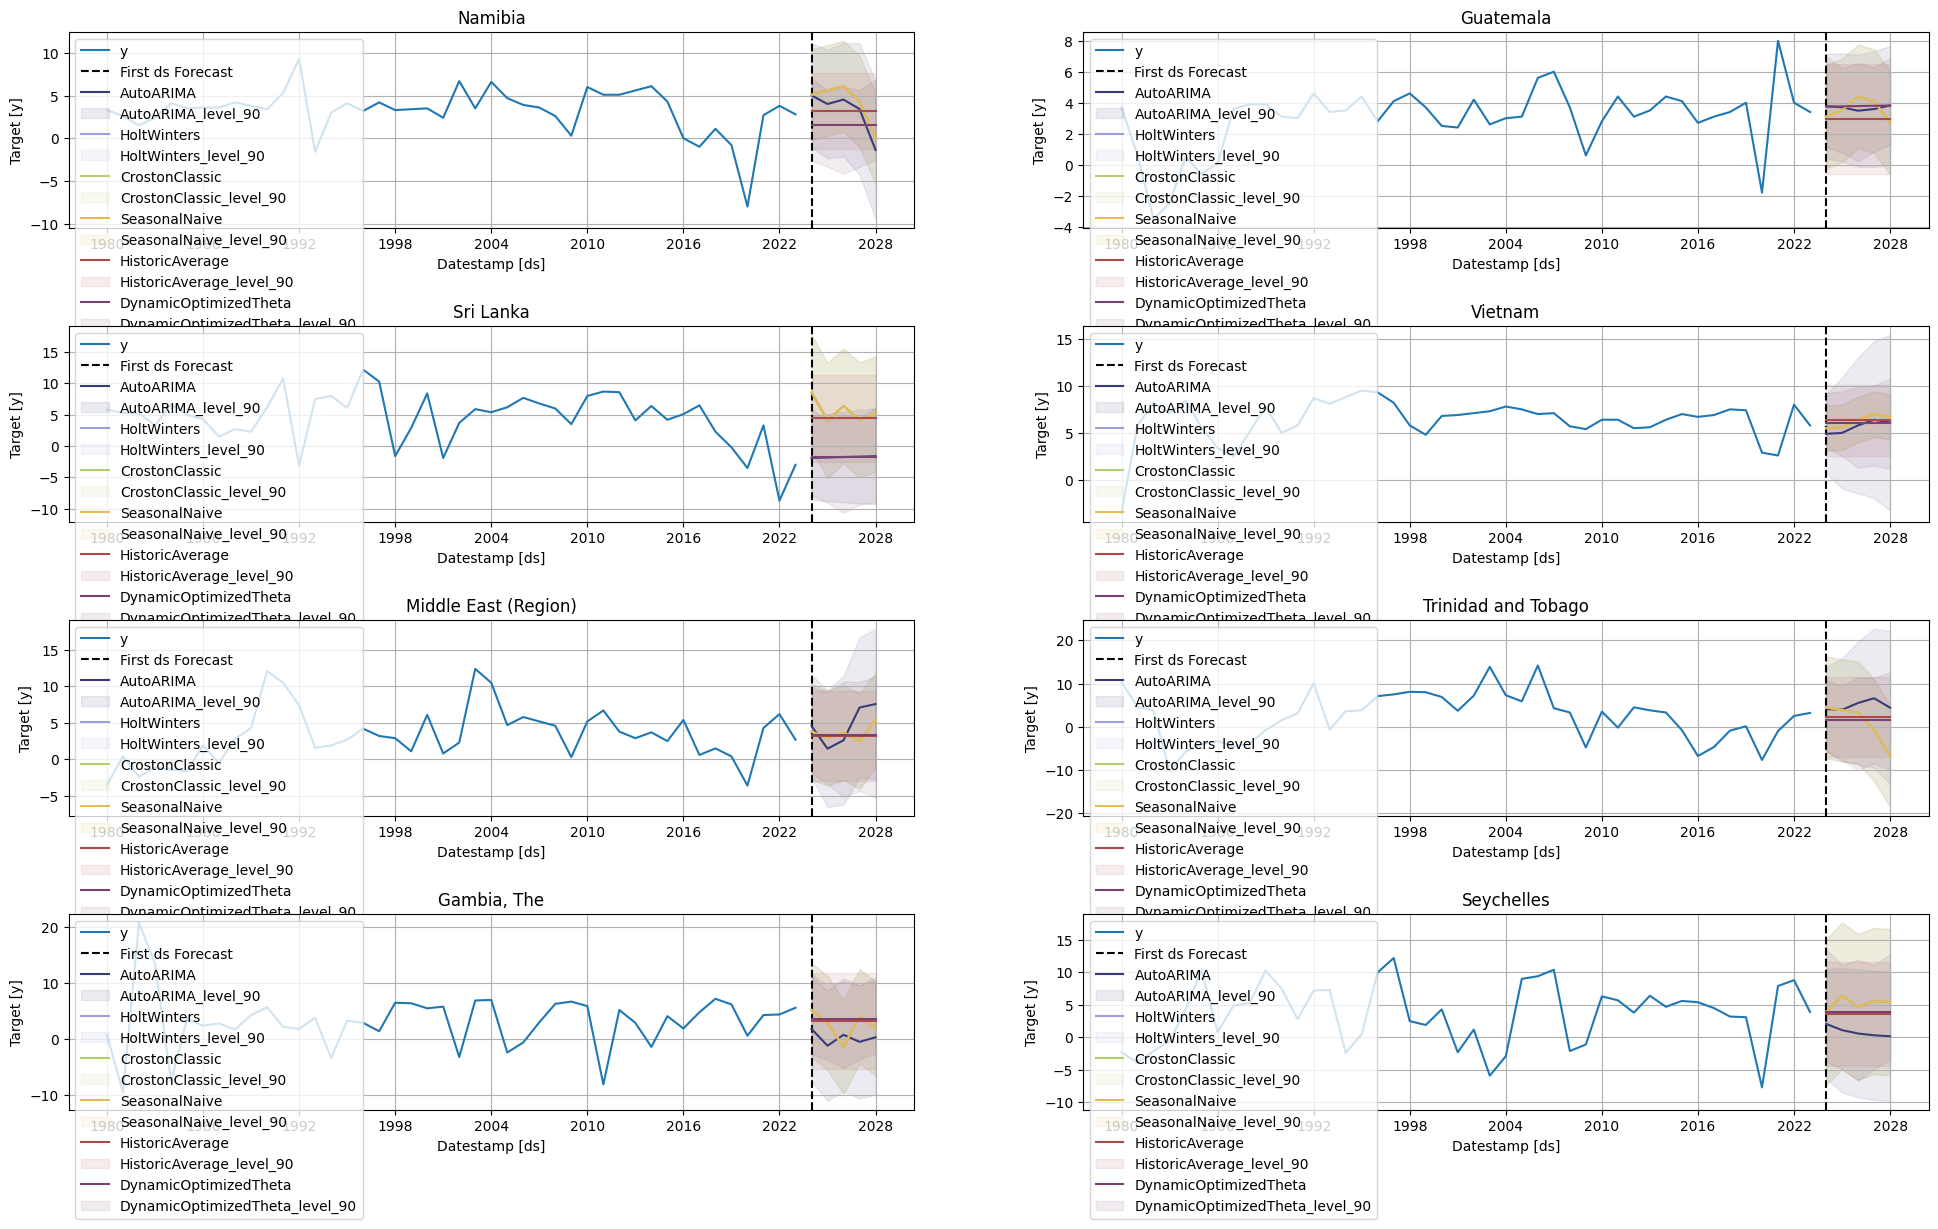

In [ ]:
sf.plot(df,forecasts_df)

## Avaliação do desempenho dos modelos

In [ ]:
crossvalidation_df = sf.cross_validation(
    df=df,
    h=5,
    step_size=12,
    n_windows=2
  )

In [ ]:
crossvalidation_df.head()

,ds,cutoff,y,AutoARIMA,HoltWinters,CrostonClassic,SeasonalNaive,HistoricAverage,DynamicOptimizedTheta
unique_id,,,,,,,,,
ASEAN-5,2007,2006,6.4,7.9,7.9,5.809963,7.9,5.411111,5.424388
ASEAN-5,2008,2006,5.1,7.4,7.4,5.809963,7.4,5.411111,5.424388
ASEAN-5,2009,2006,2.0,3.8,3.8,5.809963,3.8,5.411111,5.424388
ASEAN-5,2010,2006,7.6,-8.8,-8.8,5.809963,-8.8,5.411111,5.424388
ASEAN-5,2011,2006,4.8,3.0,3.0,5.809963,3.0,5.411111,5.424388


In [ ]:
!pip install datasetsforecast

In [ ]:
from datasetsforecast.losses import mse, mae, rmse


def evaluate_cross_validation(df, metric):
    models = df.drop(columns=['ds', 'cutoff', 'y']).columns.tolist()
    evals = []
    for model in models:
        eval_ = df.groupby(['unique_id', 'cutoff']).apply(lambda x: metric(x['y'].values, x[model].values)).to_frame() # Calculate loss for every unique_id, model and cutoff.
        eval_.columns = [model]
        evals.append(eval_)
    evals = pd.concat(evals, axis=1)
    evals = evals.groupby(['unique_id']).mean(numeric_only=True) # Averages the error metrics for all cutoffs for every combination of model and unique_id
    evals['best_model'] = evals.idxmin(axis=1)
    return evals

Aqui definimos qual o melhor modelo de predição para cada país

In [ ]:
evaluation_df = evaluate_cross_validation(crossvalidation_df, mse)

evaluation_df.head()

,AutoARIMA,HoltWinters,CrostonClassic,SeasonalNaive,HistoricAverage,DynamicOptimizedTheta,best_model
unique_id,,,,,,,
ASEAN-5,36.464699,38.613998,11.619911,38.613998,11.572392,10.803178,DynamicOptimizedTheta
Advanced economies,15.781001,15.781001,9.713020,15.781001,10.139538,9.620695,DynamicOptimizedTheta
Afghanistan,54.435520,78.765244,41.906605,78.765244,45.585377,36.724331,DynamicOptimizedTheta
Africa (Region),7.948883,8.233999,4.483368,8.233999,4.698926,4.344566,DynamicOptimizedTheta
Albania,58.904755,51.193996,11.433125,51.193996,11.095232,9.529951,DynamicOptimizedTheta


In [ ]:
summary_df = evaluation_df.groupby('best_model').size().sort_values().to_frame()

summary_df.reset_index().columns = ["Model", "Nr. of unique_ids"]

Vemos que o modelo DOT foi o melhor modelo para a maioria dos países

In [ ]:
summary_df

,0
best_model,
HoltWinters,5
AutoARIMA,13
CrostonClassic,24
HistoricAverage,81
DynamicOptimizedTheta,105


In [ ]:
def get_best_model_forecast(forecasts_df, evaluation_df):
    df = forecasts_df.set_index('ds', append=True).stack().to_frame().reset_index(level=2)
    df.columns = ['model', 'best_model_forecast']
    df = df.join(evaluation_df[['best_model']])
    df = df.query('model.str.replace("-lo-90|-hi-90", "", regex=True) == best_model').copy()
    df.loc[:, 'model'] = [model.replace(bm, 'best_model') for model, bm in zip(df['model'], df['best_model'])]
    df = df.drop(columns='best_model').set_index('model', append=True).unstack()
    df.columns = df.columns.droplevel()
    df = df.reset_index(level=1)
    return df

E sabendo o melhor modelo para cada país, podemos fazer uma previsão personalizada

In [ ]:
prod_forecasts_df = get_best_model_forecast(forecasts_df, evaluation_df)

prod_forecasts_df

model,ds,best_model,best_model-hi-90,best_model-lo-90
unique_id,,,,
ASEAN-5,2024,4.168433,10.411557,-0.781250
ASEAN-5,2025,4.166541,8.853305,-1.536248
ASEAN-5,2026,4.164701,9.395596,-2.659704
ASEAN-5,2027,4.162909,8.841671,-1.501479
ASEAN-5,2028,4.161162,9.991510,-0.598724
...,...,...,...,...
Zimbabwe,2024,1.601136,12.943612,-9.741340
Zimbabwe,2025,1.601136,12.943612,-9.741340
Zimbabwe,2026,1.601136,12.943612,-9.741340


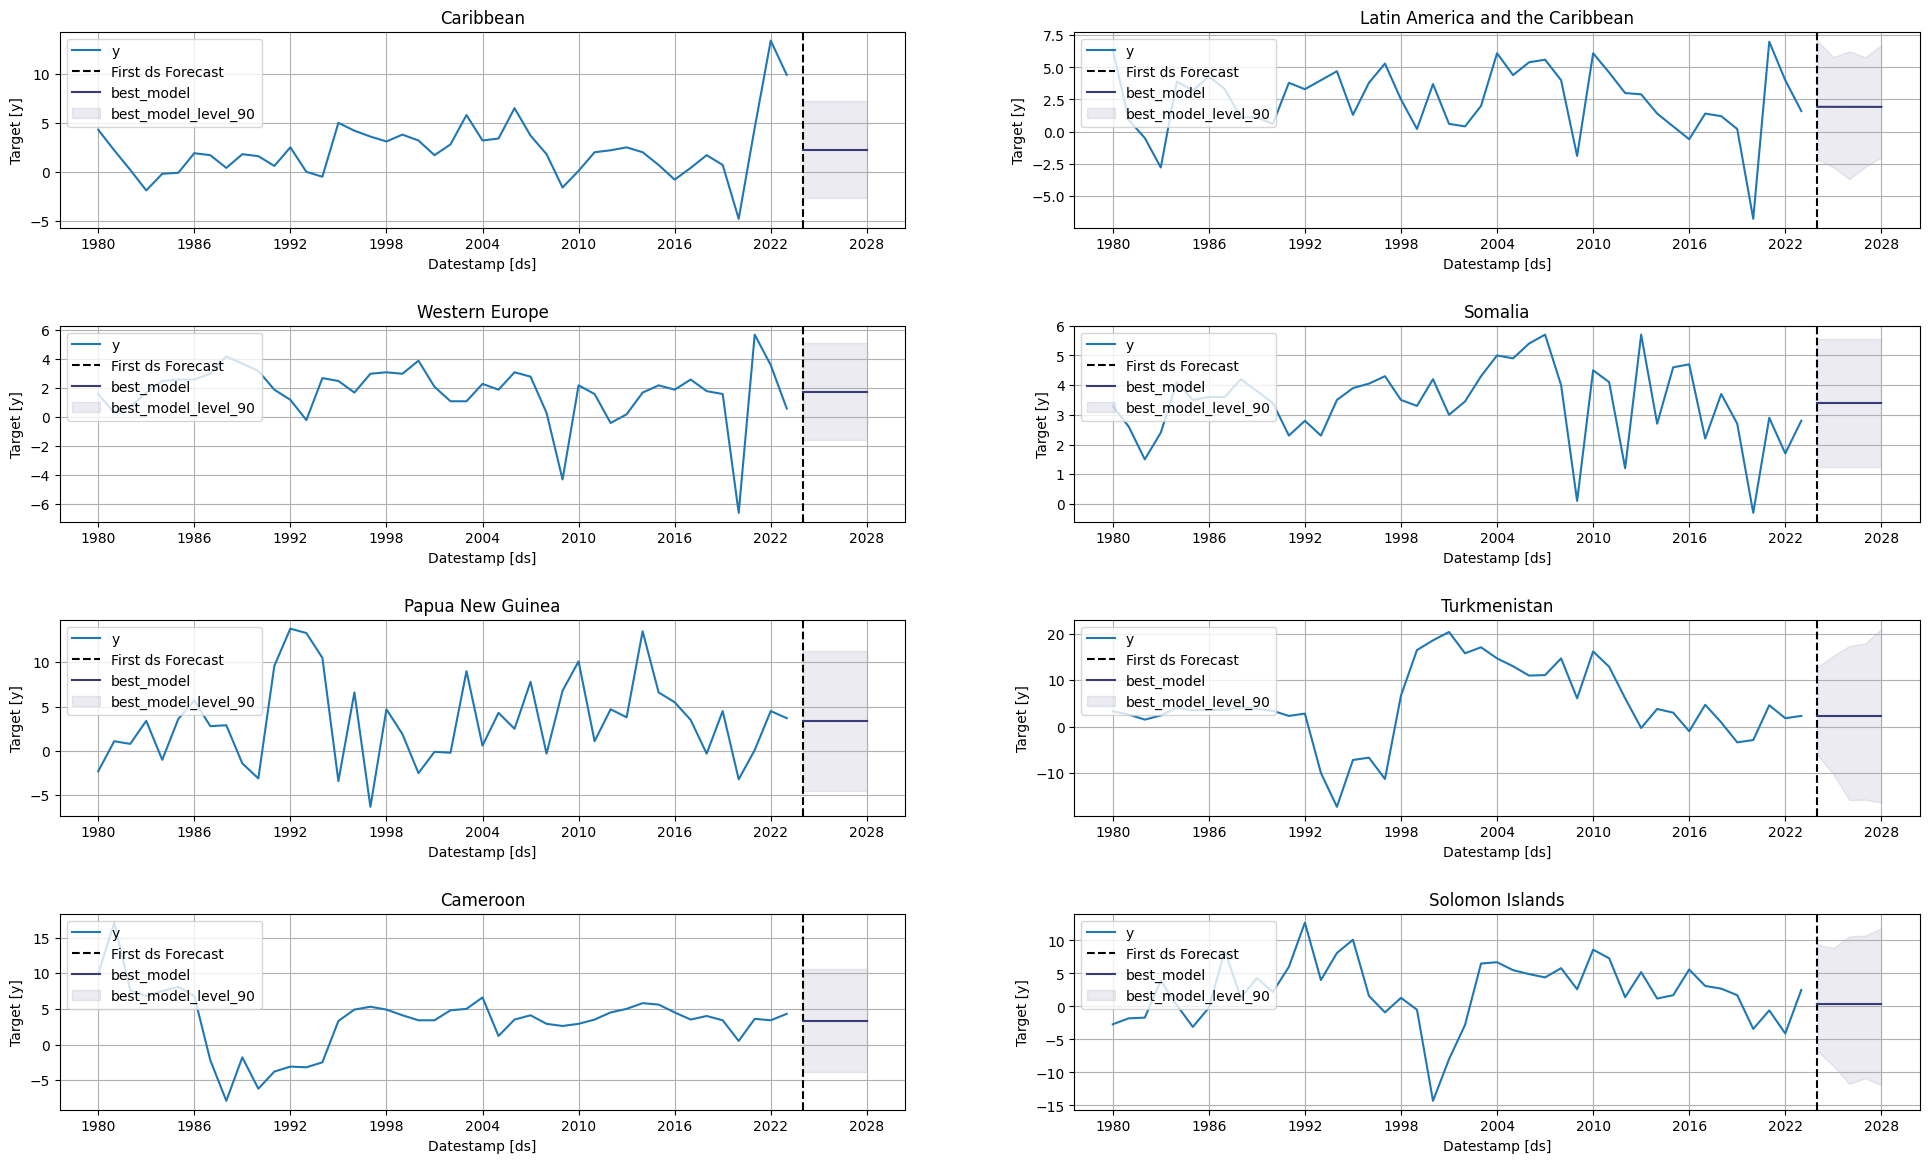

In [ ]:
sf.plot(df, prod_forecasts_df, level=[90])

In [33]:
pivot_df = prod_forecasts_df.pivot_table(index='unique_id', columns='ds', values='best_model')
pivot_df

ds,2024,2025,2026,2027,2028
unique_id,,,,,
ASEAN-5,4.168433,4.166541,4.164701,4.162909,4.161162
Advanced economies,1.787130,1.787121,1.787111,1.787102,1.787093
Afghanistan,2.975923,2.975923,2.975923,2.975923,2.975923
Africa (Region),3.279163,3.279163,3.279163,3.279163,3.279163
Albania,3.173388,3.173388,3.173388,3.173388,3.173388
...,...,...,...,...,...
Western Hemisphere (Region),2.017804,2.017804,2.017804,2.017804,2.017804
World,3.361364,3.361364,3.361364,3.361364,3.361364
Yemen,-2.024840,-2.024840,-2.024840,-2.024840,-2.024840


In [ ]:
from google.colab import files

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [34]:
pivot_df.to_csv('predicted.csv')
files.download('predicted.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>